In [78]:
import pandas as pd

df = pd.read_csv('./data/disaster-tweets.csv', encoding='ISO-8859-1')
print(df.head())

    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  778243823     True      golden                 156               NaN   
1  778243824     True      golden                 152               NaN   
2  778243825     True      golden                 137               NaN   
3  778243826     True      golden                 136               NaN   
4  778243827     True      golden                 138               NaN   

  choose_one  choose_one:confidence choose_one_gold keyword location  \
0   Relevant                 1.0000        Relevant     NaN      NaN   
1   Relevant                 1.0000        Relevant     NaN      NaN   
2   Relevant                 1.0000        Relevant     NaN      NaN   
3   Relevant                 0.9603        Relevant     NaN      NaN   
4   Relevant                 1.0000        Relevant     NaN      NaN   

                                                                                               text  \
0            

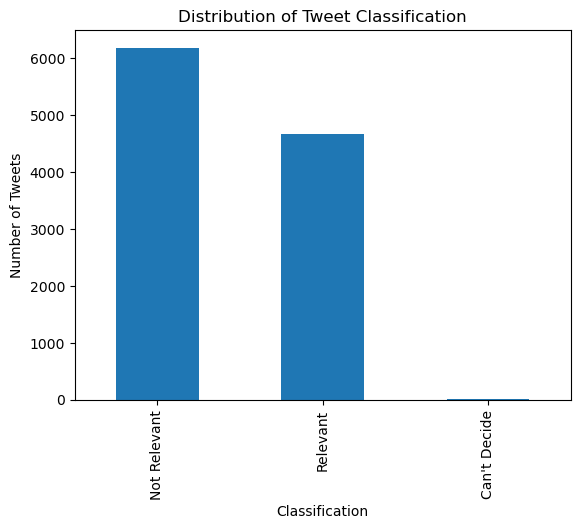

In [79]:
import matplotlib.pyplot as plt

# Plot the counts of each classification
df['choose_one'].value_counts().plot(kind='bar')
plt.title('Distribution of Tweet Classification')
plt.xlabel('Classification')
plt.ylabel('Number of Tweets')
plt.show()

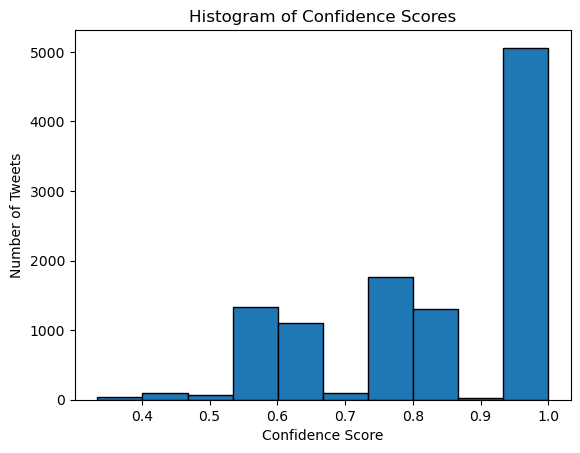

In [80]:
df['choose_one:confidence'].plot(kind='hist', edgecolor='black', bins=10)
plt.title('Histogram of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Number of Tweets')
plt.show()

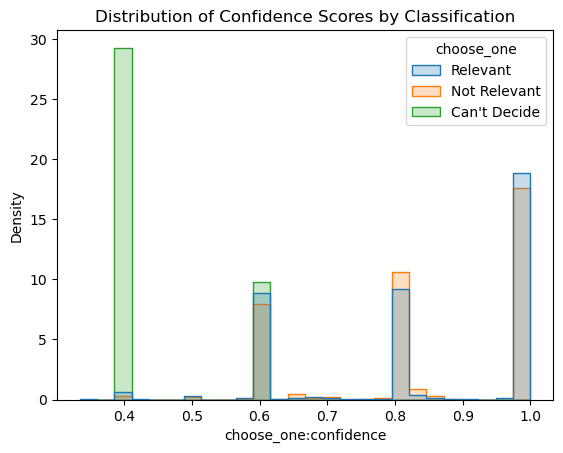

In [81]:
import seaborn as sns

sns.histplot(data=df, x='choose_one:confidence', hue='choose_one', element='step', stat="density", common_norm=False)
plt.title('Distribution of Confidence Scores by Classification')
plt.show()


In [82]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

# Apply the tokenizer to each row of the 'text' column
df['tokens'] = df['text'].apply(
    lambda x: [token.lower() for token in tokenizer.tokenize(str(x))])

# Print the first five rows of the new column
print(df[['text', 'tokens']].head())

                                                                                               text  \
0                                                                Just happened a terrible car crash   
1                             Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
2                                  Heard about #earthquake is different cities, stay safe everyone.   
3  there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all   
4                                                            Forest fire near La Ronge Sask. Canada   

                                                                                                                     tokens  
0                                                                                 [just, happened, a, terrible, car, crash]  
1                                       [our, deeds, are, the, reason, of, this, #earthquake, may, allah, forgive, us, all]  
2  

In [83]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['tokens_without_stopwords'] = df['tokens'].apply(
    lambda x: [word for word in x if word.lower() not in stop_words])

print(df[['tokens', 'tokens_without_stopwords']].head())

                                                                                                                     tokens  \
0                                                                                 [just, happened, a, terrible, car, crash]   
1                                       [our, deeds, are, the, reason, of, this, #earthquake, may, allah, forgive, us, all]   
2                                            [heard, about, #earthquake, is, different, cities, ,, stay, safe, everyone, .]   
3  [there, is, a, forest, fire, at, spot, pond, ,, geese, are, fleeing, across, the, street, ,, i, cannot, save, them, all]   
4                                                                          [forest, fire, near, la, ronge, sask, ., canada]   

                                                         tokens_without_stopwords  
0                                                [happened, terrible, car, crash]  
1                           [deeds, reason, #earthquake, may, allah, 

In [84]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

df['stemmed_tokens'] = df['tokens_without_stopwords'].apply(
    lambda x: [stemmer.stem(word) for word in x])

print(df[['tokens_without_stopwords', 'stemmed_tokens']].head())

                                                         tokens_without_stopwords  \
0                                                [happened, terrible, car, crash]   
1                           [deeds, reason, #earthquake, may, allah, forgive, us]   
2             [heard, #earthquake, different, cities, ,, stay, safe, everyone, .]   
3  [forest, fire, spot, pond, ,, geese, fleeing, across, street, ,, cannot, save]   
4                                [forest, fire, near, la, ronge, sask, ., canada]   

                                                               stemmed_tokens  
0                                               [happen, terribl, car, crash]  
1                          [deed, reason, #earthquak, may, allah, forgiv, us]  
2                [heard, #earthquak, differ, citi, ,, stay, safe, everyon, .]  
3  [forest, fire, spot, pond, ,, gees, flee, across, street, ,, cannot, save]  
4                             [forest, fire, near, la, rong, sask, ., canada]  


In [85]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df["text_lemmatized"] = df["tokens_without_stopwords"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

print(df[['tokens_without_stopwords', 'text_lemmatized']].head())


                                                         tokens_without_stopwords  \
0                                                [happened, terrible, car, crash]   
1                           [deeds, reason, #earthquake, may, allah, forgive, us]   
2             [heard, #earthquake, different, cities, ,, stay, safe, everyone, .]   
3  [forest, fire, spot, pond, ,, geese, fleeing, across, street, ,, cannot, save]   
4                                [forest, fire, near, la, ronge, sask, ., canada]   

                                                                  text_lemmatized  
0                                                [happened, terrible, car, crash]  
1                             [deed, reason, #earthquake, may, allah, forgive, u]  
2               [heard, #earthquake, different, city, ,, stay, safe, everyone, .]  
3  [forest, fire, spot, pond, ,, goose, fleeing, across, street, ,, cannot, save]  
4                                [forest, fire, near, la, ronge, sask

In [86]:
# Compare the stemmed and lemmatized versions of the first 20 tweets
for i in range(5):
    print('Original:', df['tokens_without_stopwords'][i])
    print('Stemmed:', df['stemmed_tokens'][i])
    print('Lemmatized:', df['text_lemmatized'][i])
    print()
    

Original: ['happened', 'terrible', 'car', 'crash']
Stemmed: ['happen', 'terribl', 'car', 'crash']
Lemmatized: ['happened', 'terrible', 'car', 'crash']

Original: ['deeds', 'reason', '#earthquake', 'may', 'allah', 'forgive', 'us']
Stemmed: ['deed', 'reason', '#earthquak', 'may', 'allah', 'forgiv', 'us']
Lemmatized: ['deed', 'reason', '#earthquake', 'may', 'allah', 'forgive', 'u']

Original: ['heard', '#earthquake', 'different', 'cities', ',', 'stay', 'safe', 'everyone', '.']
Stemmed: ['heard', '#earthquak', 'differ', 'citi', ',', 'stay', 'safe', 'everyon', '.']
Lemmatized: ['heard', '#earthquake', 'different', 'city', ',', 'stay', 'safe', 'everyone', '.']

Original: ['forest', 'fire', 'spot', 'pond', ',', 'geese', 'fleeing', 'across', 'street', ',', 'cannot', 'save']
Stemmed: ['forest', 'fire', 'spot', 'pond', ',', 'gees', 'flee', 'across', 'street', ',', 'cannot', 'save']
Lemmatized: ['forest', 'fire', 'spot', 'pond', ',', 'goose', 'fleeing', 'across', 'street', ',', 'cannot', 'save']


In [87]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user', 'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated", 'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens  
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    # corpus used for spell correction
    corrector="twitter", 
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # unpack contractions (can't -> can not)
    spell_correct_elong=True,  # spell correction for elongated words
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

df['cleaned_text'] = df['text'].apply(lambda x: " ".join(text_processor.pre_process_doc(x)))

print(df[['text', 'cleaned_text']].head())

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...
                                                                                               text  \
0                                                                Just happened a terrible car crash   
1                             Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
2                                  Heard about #earthquake is different cities, stay safe everyone.   
3  there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all   
4                                                            Forest fire near La Ronge Sask. Canada   

                                                                                                     cleaned_text  
0                                                                              just happened a terrible car crash  
1  our deeds are the reason of this <hashtag> earthquake </has

In [88]:
import re


def remove_special_characters_and_numbers(text):
    # This pattern matches any character that is NOT a word character (represented by \W)
    # or a whitespace (represented by \s). Additionally, it matches digits (represented by \d).
    return re.sub(r'[\W_]+|\d+', ' ', text)


df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_special_characters_and_numbers(x))

nonimportant_words = ['hashtag', 'allcaps', 'url', 'repeated', 'number']

def remove_nonimportant_words(text):
    return ' '.join([word for word in text.split() if word not in nonimportant_words])

df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_nonimportant_words(x))

print(df[['text', 'cleaned_text']].head())

                                                                                               text  \
0                                                                Just happened a terrible car crash   
1                             Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
2                                  Heard about #earthquake is different cities, stay safe everyone.   
3  there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all   
4                                                            Forest fire near La Ronge Sask. Canada   

                                                                                     cleaned_text  
0                                                              just happened a terrible car crash  
1                            our deeds are the reason of this earthquake may allah forgive us all  
2                                   heard about earthquake is different cities st

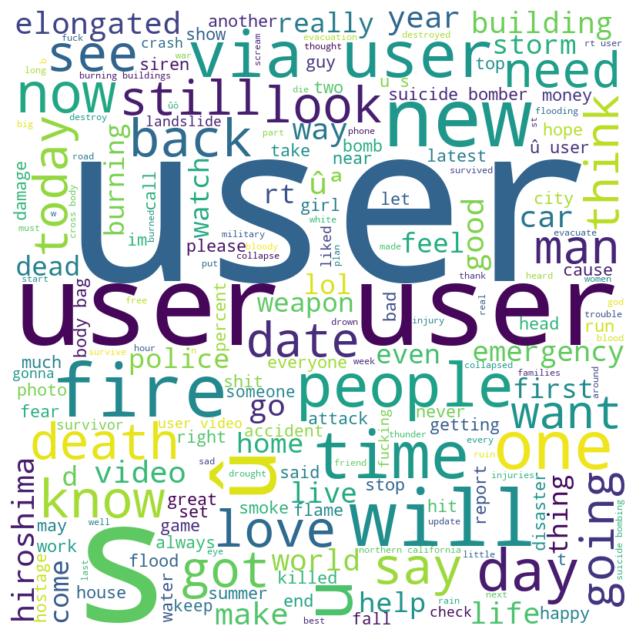

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the texts together
text = ' '.join(df['cleaned_text'])

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


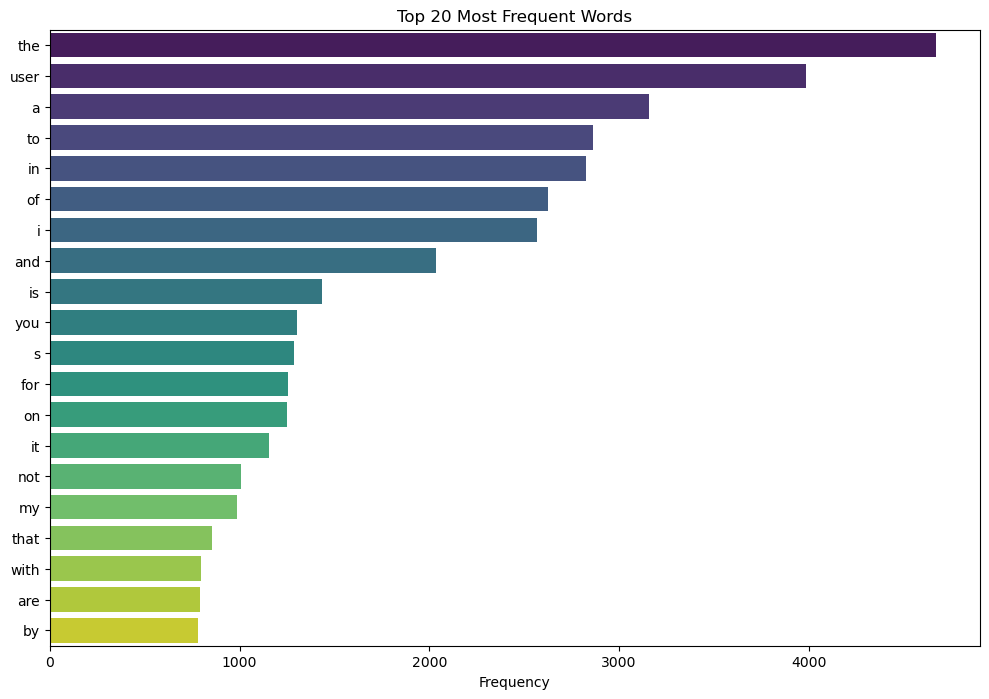

In [90]:
from collections import Counter
import seaborn as sns

# Tokenize and get the word frequency
words = ' '.join(df['cleaned_text']).split()
frequency = Counter(words)

# Select top N words
N = 20
most_common = frequency.most_common(N)
words, counts = zip(*most_common)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title(f"Top {N} Most Frequent Words")
plt.xlabel("Frequency")
plt.show()


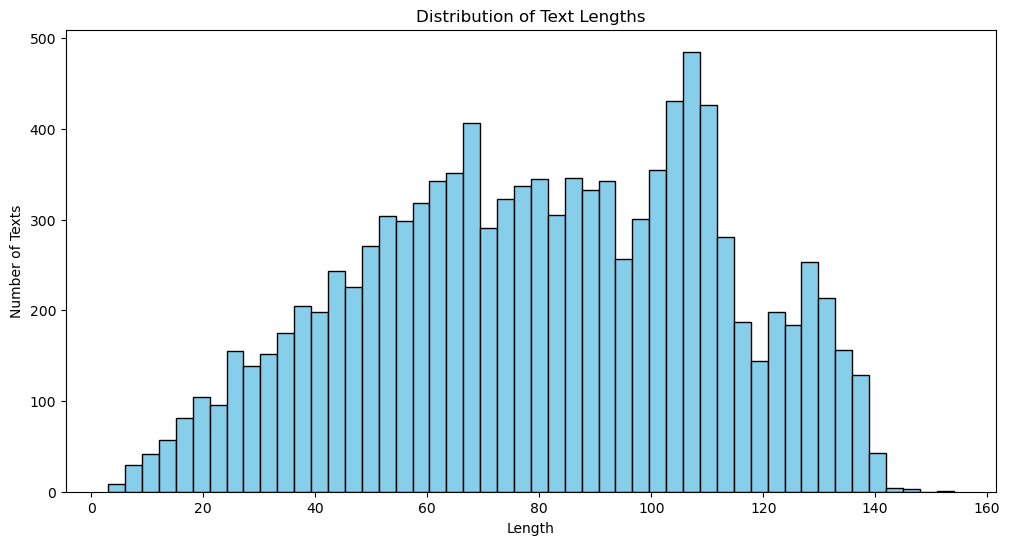

In [91]:
df['text_length'] = df['cleaned_text'].apply(len)

plt.figure(figsize=(12, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Text Lengths")
plt.xlabel("Length")
plt.ylabel("Number of Texts")
plt.show()


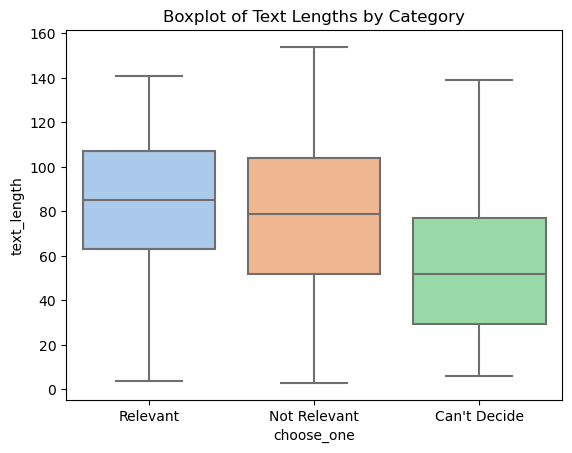

In [92]:
sns.boxplot(data=df, x='choose_one', y='text_length', palette='pastel')
plt.title("Boxplot of Text Lengths by Category")
plt.show()

# This shows us that if a tweet is marked as relevant, it is more likely to be longer than a tweet that is not relevant.


We now want to check what columns are categorical features. We suspect that `_unit_state`, `choose_one` and `choose_one_gold` may be categorical.

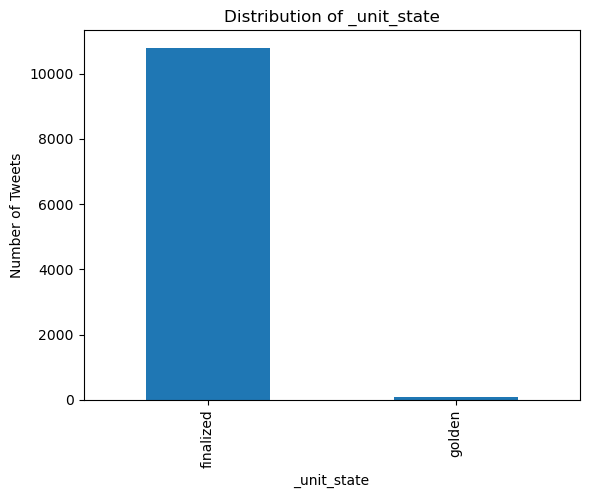

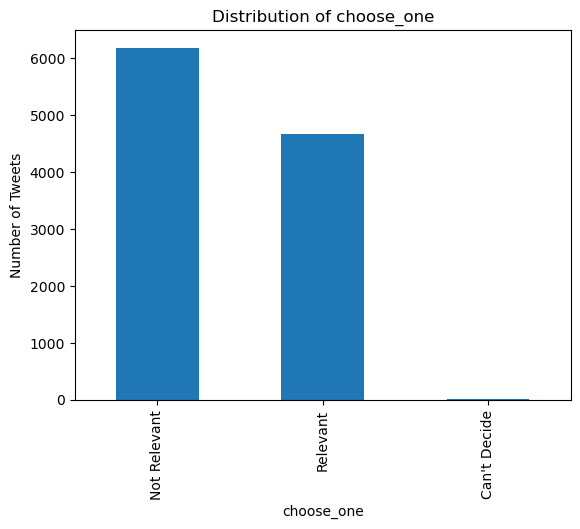

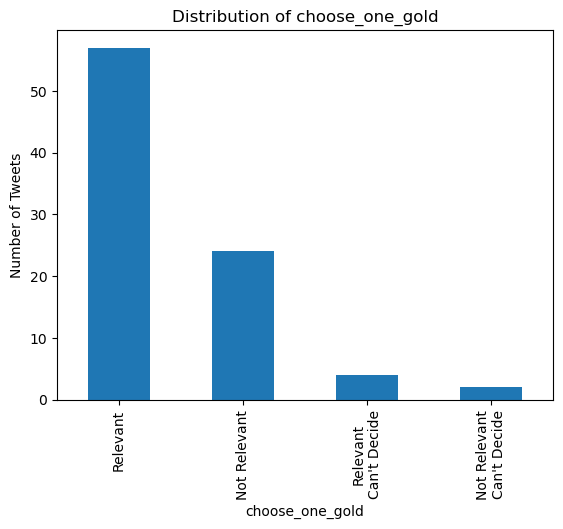

In [93]:
# Visualize each column named above using a bar chart
def plot_bar_chart(df, column):
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Number of Tweets')
    plt.show()

plot_bar_chart(df, '_unit_state')
plot_bar_chart(df, 'choose_one')
plot_bar_chart(df, 'choose_one_gold')

The `choose_one_gold` column seems to be a rare occurrence. Perhaps we should drop it. Rather, we'll perhaps stick to `choose_one`. 

In [94]:
# Select non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize empty list for potential categorical columns
potential_categorical_columns = []

# Iterate over non-numeric columns
for col in non_numeric_columns:
    try:
        # If unique values are less than 5% of total rows, consider the column as categorical
        if df[col].nunique() / len(df) < 0.05:
            potential_categorical_columns.append(col)
    except TypeError:
        # This will catch columns that cause the TypeError (e.g., columns with list-type values)
        # You can either skip these columns or handle them differently
        pass

print(potential_categorical_columns)

['_unit_state', 'choose_one', 'choose_one_gold', 'keyword']


In [95]:
import pandas as pd

# Use get_dummies to perform one-hot encoding on the 'choose_one' column
df = pd.get_dummies(df, columns=['choose_one'], prefix=['choose_one'])

# The dataframe df now has new columns corresponding to the unique values in the 'choose_one' column
# Each new column will be named "choose_one_<value_from_choose_one_column>"

# Print the head of all column containing the prefix 'choose_one'
print(df.filter(regex='choose_one').head())

   choose_one:confidence choose_one_gold  choose_one_Can't Decide  \
0                 1.0000        Relevant                        0   
1                 1.0000        Relevant                        0   
2                 1.0000        Relevant                        0   
3                 0.9603        Relevant                        0   
4                 1.0000        Relevant                        0   

   choose_one_Not Relevant  choose_one_Relevant  
0                        0                    1  
1                        0                    1  
2                        0                    1  
3                        0                    1  
4                        0                    1  


We assume the following: Regarding `_trusted_judgements`, the `_trusted_judgments` column likely refers to the number of trusted evaluators or annotators who have judged or labeled the content of the tweet. Higher numbers in this column might suggest greater consensus or confidence in the label assigned to a particular tweet, since more individuals have weighed in on its content. Conversely, a lower number could mean fewer judgments, and potentially less certainty in the label, especially if there's disagreement among annotators.

In order to know if we should standardize or normalize the `_trusted_judgements` column, we need to know the distribution of the values in the column.


count     84.000000
mean     122.297619
std       23.104154
min       86.000000
25%       99.000000
50%      135.500000
75%      142.000000
max      157.000000
Name: _trusted_judgments, dtype: float64


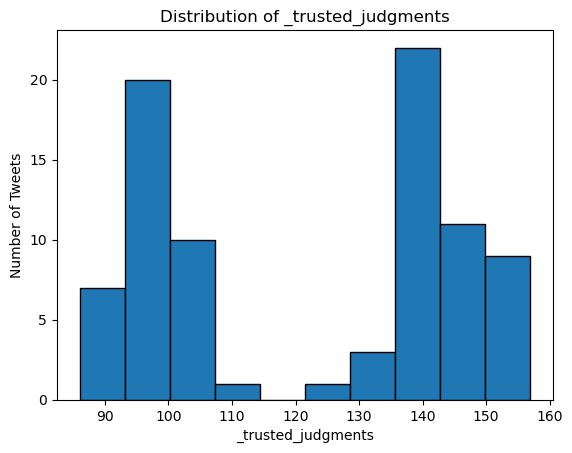

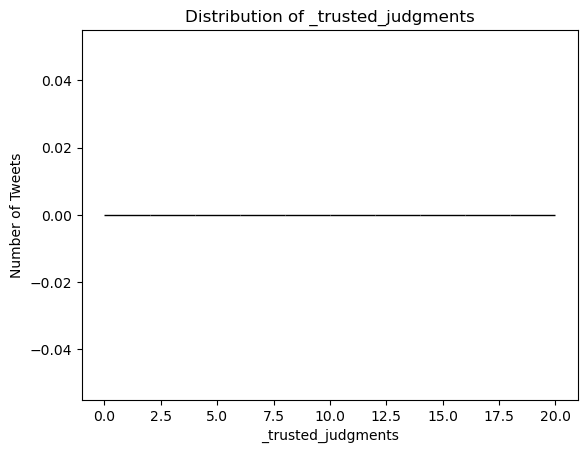

In [106]:
# Check if the range of `_trusted_judgments` is very wide
print(df['_trusted_judgments'].describe())

# Plot the distribution of `_trusted_judgments`
plt.hist(df['_trusted_judgments'], bins=10, edgecolor='black')
plt.title("Distribution of _trusted_judgments")
plt.xlabel("_trusted_judgments")
plt.ylabel("Number of Tweets")
plt.show()

# Only plot in the range of 0 to 20
plt.hist(df['_trusted_judgments'], bins=10, range=(0, 20), edgecolor='black')
plt.title("Distribution of _trusted_judgments")
plt.xlabel("_trusted_judgments")
plt.ylabel("Number of Tweets")
plt.show()

We can visually see, and confirmed by the cell above, that most tweets have a `_trusted_judgements` value of 5. We can also see that the distribution is skewed a bit to the right.

In [98]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardizing _trusted_judgments
scaler = StandardScaler()
df['_trusted_judgments_standardized'] = scaler.fit_transform(
    df['_trusted_judgments'].values.reshape(-1, 1))

# Normalizing _trusted_judgments
scaler = MinMaxScaler()
df['_trusted_judgments_normalized'] = scaler.fit_transform(
    df['_trusted_judgments'].values.reshape(-1, 1))

# Print the normalized and standardized columns
print(df[['_trusted_judgments_standardized', '_trusted_judgments_normalized']].head())


   _trusted_judgments_standardized  _trusted_judgments_normalized
0                        14.333596                       0.993506
1                        13.951310                       0.967532
2                        12.517735                       0.870130
3                        12.422163                       0.863636
4                        12.613307                       0.876623


It might be interesting to check if there's a correlation between the number of `_trusted_judgments` (normalized) and the `choose_one:confidence` column. Intuitively, tweets with more judgments might be expected to have higher confidence scores, indicating consensus among annotators.

0.061575281029639474


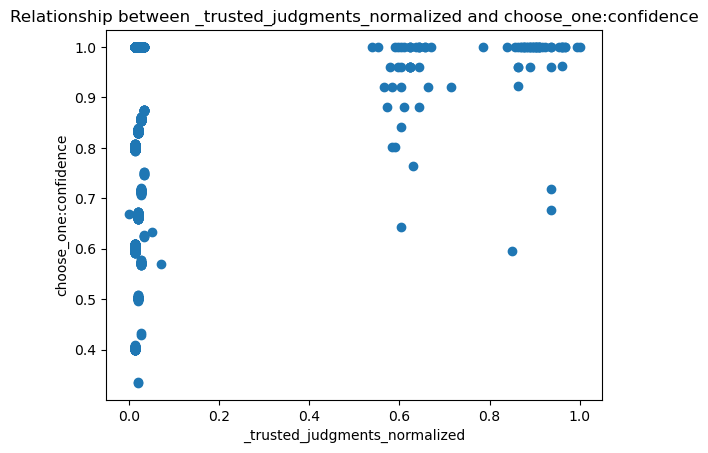

In [99]:
# Check the correlation between `_trusted_judgments_normalized` and `choose_one:confidence`
print(df['_trusted_judgments_normalized'].corr(df['choose_one:confidence']))

# Visualize the relationship between `_trusted_judgments_normalized` and `choose_one:confidence`
plt.scatter(df['_trusted_judgments_normalized'], df['choose_one:confidence'])
plt.title("Relationship between _trusted_judgments_normalized and choose_one:confidence")
plt.xlabel("_trusted_judgments_normalized")
plt.ylabel("choose_one:confidence")
plt.show()

Based on the plot above, we can see that tweets with a high normalized `_trusted_judgements` value tend to have higher confidence scores. This suggests that there is some correlation between the two variables. However, perhaps we should remove some data with a very low `_trusted_judgements` value (e.g. `< 0.1`), since the confidence scores for these tweets are all over the place. This may distort the correlation.

0.20200566589033978

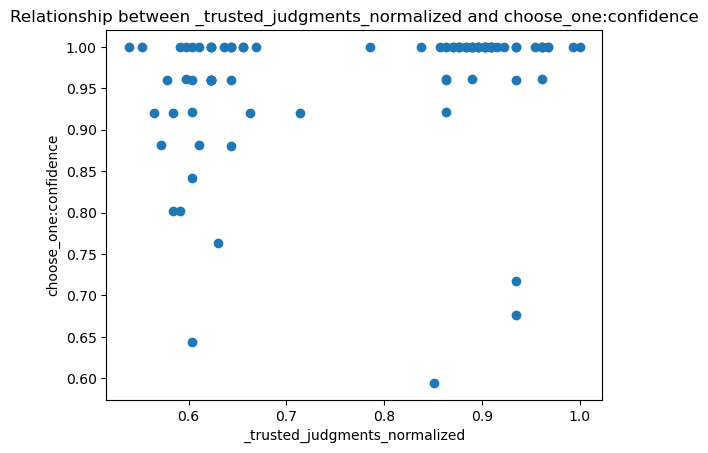

In [100]:
# Remove data with a `_trusted_judgements_normalized` value lower than 0.1
df = df[df['_trusted_judgments_normalized'] > 0.1]

# Check the correlation between `_trusted_judgments_normalized` and `choose_one:confidence` again
print(df['_trusted_judgments_normalized'].corr(df['choose_one:confidence']))

# Plot the same scatterplot again
plt.scatter(df['_trusted_judgments_normalized'], df['choose_one:confidence'])
plt.title("Relationship between _trusted_judgments_normalized and choose_one:confidence")
plt.xlabel("_trusted_judgments_normalized")
plt.ylabel("choose_one:confidence")
plt.show()

In [101]:
# Inspect the `_trusted_judgments_standardized` column
print(df['_trusted_judgments_standardized'].describe())
print("----------")

# Check if any z-score in the `_trusted_judgments_standardized` column is unusually high or low
print(df['_trusted_judgments_standardized'].abs().sort_values(ascending=False).head(10))
print("----------")

# Check which tweets deserved the unusually high or low z-scores. Include the full `text` column.
print([
    df['text'].iloc[
      # Get the index of the top 10 highest and lowest z-scores
      df['_trusted_judgments_standardized'].abs().sort_values(ascending=False).head(10).index
    ]
])
print("----------")

count    84.000000
mean     11.112604
std       2.208102
min       7.643580
25%       8.886012
50%      12.374377
75%      12.995593
max      14.429168
Name: _trusted_judgments_standardized, dtype: float64
----------
11    14.429168
0     14.333596
1     13.951310
10    13.951310
45    13.855738
43    13.855738
7     13.855738
21    13.855738
37    13.760166
15    13.473451
Name: _trusted_judgments_standardized, dtype: float64
----------
[11                                                      Typhoon Soudelor kills 28 in China and Taiwan
0                                                                  Just happened a terrible car crash
1                               Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
10    #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
45                                                                                           Awesome!
43                                             

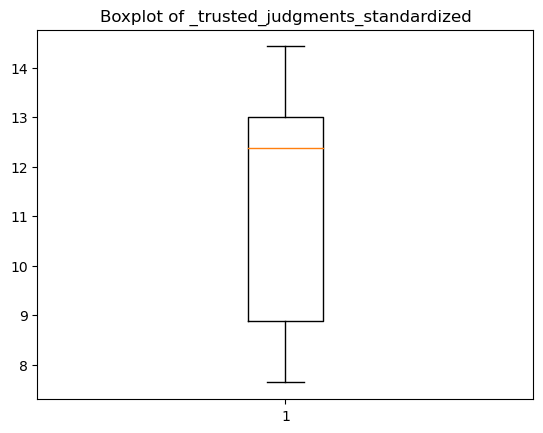

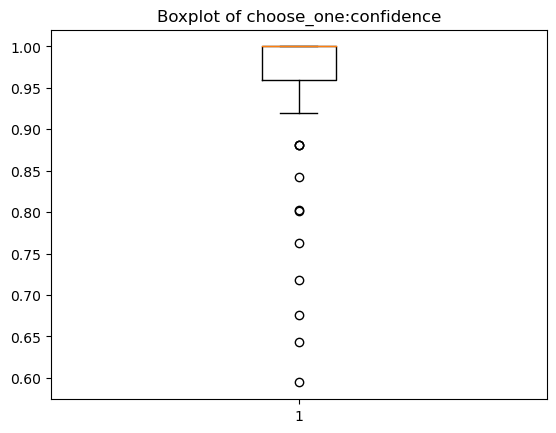

count    84.000000
mean      0.957750
std       0.084189
min       0.594500
25%       0.960100
50%       1.000000
75%       1.000000
max       1.000000
Name: choose_one:confidence, dtype: float64


In [102]:
# Create a boxplot for the `_trusted_judgments_standardized` column
plt.boxplot(df['_trusted_judgments_standardized'])
plt.title("Boxplot of _trusted_judgments_standardized")
plt.show()

# Create a boxplot of the `choose_one:confidence` column
plt.boxplot(df['choose_one:confidence'])
plt.title("Boxplot of choose_one:confidence")
plt.show()

# Describe the `choose_one:confidence` column
print(df['choose_one:confidence'].describe())


In [103]:
# Check the tweets with a `choose_one:confidence` value below 0.9. Display the full `text` column.
pd.set_option('display.max_colwidth', None)
print(df[df['choose_one:confidence'] < 0.9]['text'])

15                                                                                    I'm afraid that the tornado is coming to our area...
19                                                                                                 #Flood in Bago Myanmar #We arrived Bago
44                                                                                                                                The end!
10840                                    #Sismo DETECTADO #JapÌ_n 15:41:07 Seismic intensity 0 Iwate Miyagi JST #?? http://t.co/gMoUl9zQ2Q
10855                                         Evacuation order lifted for town of Roosevelt: http://t.co/EDyfo6E2PU http://t.co/M5KxLPKFA1
10857    To conference attendees! The blue line from the airport has DERAILED - please look into taking a taxi to the hotel! See you soon!
10860                                                                    a siren just went off and it wasn't the Forney tornado warning ??
10864                   on 

As we can see from the boxplot of outliers and the actual tweets with confidence below 0.9, there are still many tweets that concern a disaster that have a lower confidence score.

From the box plot for the `choose_one:confidence` column, we can draw several insights:

**Median:**

- The median value is 1. This indicates that half of the values in the choose_one:confidence column are at 1, and the other half are below 1. Given the nature of confidence scores, this likely indicates that many of the judgments are made with full confidence.

**First Quartile (Q1) and Third Quartile (Q3):**

- Lower quartile (Q1) at about 0.95: About 25% of the data points have confidence values below 0.95.
- Upper quartile (Q3) at 1: About 75% of the data points have confidence values below 1, which is also the median. 
- This indicates that the majority of the data points (from the median to the upper quartile) have the maximum confidence value of 1.

**Minimum:**

- The smallest non-outlier value is 0.90. This is the lowest confidence value that is not considered an outlier.

**Outliers:**

- The many small dots from 0.60 up to 0.90 represent the outliers in our dataset. These are individual observations that fall far from the rest of the data, below the minimum value. The presence of many dots suggests that there are several data points with confidence levels significantly lower than the majority of the dataset.